Scope of this file is to appreciate the concept of Separation principle.
In few words we want to understand the role of the observer in the system response.
First of all let us define the system by means of its state space formulation

<html>
   <head>
      <title>Diagram with Observer</title>
   </head>

   <body>
      <img src="separation.svg" alt="Sampling" width="400"
         height="60">
   </body>
</html>

In [9]:
pkg load control
clear all

% Init of the system
A = [-5 0; 1 -8]
B = [1; 0]

% Measurement
C = [0 1]


A =

  -5   0
   1  -8

B =

   1
   0

C =

   0   1



Before we perform any design we need to perform Controllability and Observability test

In [10]:
% Controllability
Wc = [B A*B]


% Observability test
Wo = [C; C*A]
 

Wc =

   1  -5
   0   1

Wo =

   0   1
   1  -8



By using the command place we can design the controller and the observer as a dual problem

In [11]:
%% Control Design
K = place(A,B,[-20+1j*20 -20-1j*20])
    
% Observer design 
Kc = place(A',C',[-5+1j*10 -5-1j*10])

K =

    27   544

Kc =

   100    -3



Then we can define the state space formulation of the closed loop with and without the observer.
At the same time we calculate the exponential matrix to calculate the system response in closed form

In [12]:
% System Def close loop with observer
% Time step for the calculation
Ts = 0.001;
Acl = [A-B*K B*K; zeros(2,2) A-Kc'*C]
esol = expm(Acl*Ts)

% System Close loop without observer
Acl2 = [A-B*K]
esol2 = expm(Acl2*Ts)


Acl =

   -32  -544    27   544
     1    -8     0     0
     0     0    -5  -100
     0     0     1    -5

esol =

   0.96824  -0.53319   0.02677   0.53266
   0.00098   0.99176   0.00001   0.00027
   0.00000   0.00000   0.99496  -0.09950
   0.00000   0.00000   0.00099   0.99496

Acl2 =

   -32  -544
     1    -8

esol2 =

   9.6824e-01  -5.3319e-01
   9.8013e-04   9.9176e-01



By iterating the system matrix we can calculate finally the transient response of the two systems and compare.
In red the system response with observer
In blu the system response without observer
In green the dynamic of the observer

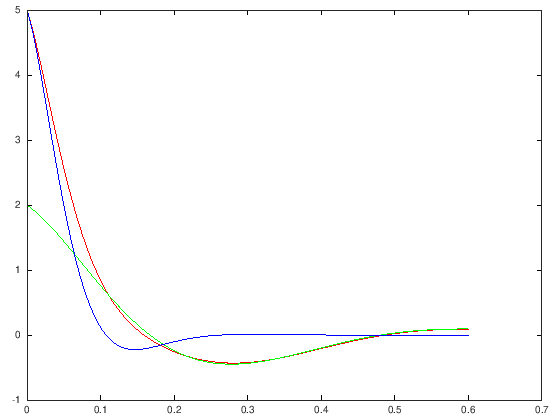

In [13]:
% Initial Conditions
xini = [5; 5; 2; 2];
x(:,1) = xini;
x2(:,1) = [5; 5];

% Number of points
npoints = 600;

for i=1:npoints
  t(i) = (i-1)*Ts;
  x(:,i+1)= esol*x(:,i); 
  x2(:,i+1)= esol2*x2(:,i); 
end
t(i+1) = npoints*Ts;

plot(t,x(2,:),'r',t,x(4,:),'g',t,x2(2,:),'b')

  
  

Play with the position of the poles of the observer to indentify the interaction between controller and observer